In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 한글폰트 사용을 위한 설정(Window)
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)

1. 데이터 수집 및 로드

In [11]:
df = pd.read_csv('data/incomeDrug.csv')
df.head()

,Year,PesonalIncome,PriceIndex,Drugs,Psychotropic,Hemp,TotalDrugs,DrugRegulation,DrugSystemUpdate,Drug_law_revision,UnemploymentRate
0,2010,3144,86.4,1124,6771,1837,9732,1,0,0,3.7
1,2011,3173,89.9,759,7226,1189,9174,1,0,0,3.4
2,2012,3252,91.8,582,7631,1042,9255,2,1,1,3.2
3,2013,3364,93.0,685,7902,1177,9764,1,0,0,3.1
4,2014,3459,94.2,676,8121,1187,9984,2,1,1,3.5


2. 데이터구조 및 변수 이해

In [14]:
print(df.info())
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               15 non-null     int64  
 1   PesonalIncome      15 non-null     int64  
 2   PriceIndex         15 non-null     float64
 3   Drugs              15 non-null     int64  
 4   Psychotropic       15 non-null     int64  
 5   Hemp               15 non-null     int64  
 6   TotalDrugs         15 non-null     int64  
 7   DrugRegulation     15 non-null     int64  
 8   DrugSystemUpdate   15 non-null     int64  
 9   Drug_law_revision  15 non-null     int64  
 10  UnemploymentRate   15 non-null     float64
dtypes: float64(2), int64(9)
memory usage: 1.4 KB
None
(15, 11)


3. 데이터요약 및 기술통계

In [15]:
print(df.describe())

              Year  PesonalIncome  PriceIndex        Drugs  Psychotropic  \
count    15.000000      15.000000   15.000000    15.000000     15.000000   
mean   2017.000000    3782.400000   98.546667  1568.400000  10895.266667   
std       4.472136     410.936526    7.825678   886.134366   3666.752484   
min    2010.000000    3144.000000   86.400000   582.000000   6771.000000   
25%    2013.500000    3411.500000   93.600000   941.500000   8011.500000   
50%    2017.000000    3932.000000   97.600000  1467.000000  10631.000000   
75%    2020.500000    4075.500000  101.250000  1879.000000  11823.000000   
max    2024.000000    4391.000000  114.200000  3970.000000  19556.000000   

              Hemp    TotalDrugs  DrugRegulation  DrugSystemUpdate  \
count    15.000000     15.000000       15.000000         15.000000   
mean   2206.333333  14670.000000        2.000000          0.200000   
std    1134.882729   5404.198117        0.845154          0.414039   
min    1042.000000   9174.000000   

4. 중복값, 결측치, 이상치 탐지 및 전처리

In [ ]:
# 중복값 : 연도별로 나오는 개별 데이터로 겹치는 값 존재하지 않음
# 결측치 없음
df.isna().sum() 

Year                 0
PesonalIncome        0
PriceIndex           0
Drugs                0
Psychotropic         0
Hemp                 0
TotalDrugs           0
DrugRegulation       0
DrugSystemUpdate     0
Drug_law_revision    0
UnemploymentRate     0
dtype: int64

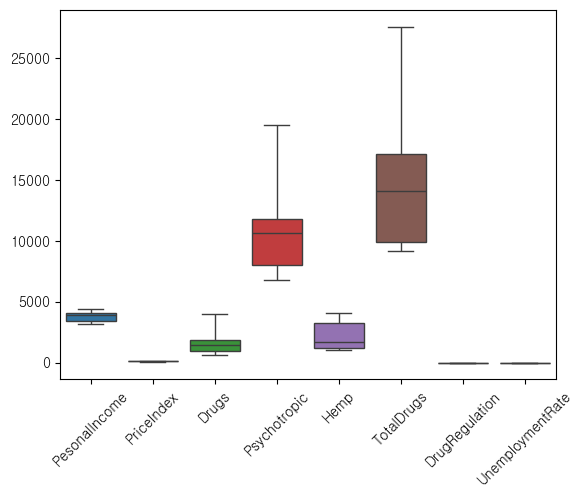

In [28]:
# 이상치탐지 : 특이값 x
sns.boxplot(data=df[['PesonalIncome','PriceIndex','Drugs','Psychotropic','Hemp','TotalDrugs','DrugRegulation','UnemploymentRate']], whis=2.5)
plt.xticks(rotation=45)
plt.show()


In [61]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler

num_cols = ['PesonalIncome','PriceIndex','Drugs','Psychotropic','Hemp',
            'TotalDrugs','DrugRegulation','DrugSystemUpdate','Drug_law_revision',
            'UnemploymentRate']

scaler = StandardScaler()
scaled = scaler.fit_transform(df[num_cols])
df_scaled = pd.DataFrame(scaled, columns=num_cols)
df_scaled['Year'] = df['Year']
df_scaled.head()


,PesonalIncome,PriceIndex,Drugs,Psychotropic,Hemp,TotalDrugs,DrugRegulation,DrugSystemUpdate,Drug_law_revision,UnemploymentRate,Year
0,-1.608051,-1.606633,-0.519106,-1.164251,-0.336860,-0.945805,-1.224745,-0.5,-0.5,0.664558,2010
1,-1.535003,-1.143690,-0.945465,-1.035808,-0.927884,-1.052682,-1.224745,-0.5,-0.5,-0.102240,2011
2,-1.336012,-0.892378,-1.152219,-0.921479,-1.061960,-1.037167,0.000000,2.0,2.0,-0.613438,2012
3,-1.053898,-0.733655,-1.031904,-0.844978,-0.938829,-0.939675,-1.224745,-0.5,-0.5,-0.869038,2013
4,-0.814605,-0.574931,-1.042417,-0.783156,-0.929709,-0.897538,0.000000,2.0,2.0,0.153360,2014


5. 변수 분포 시각화

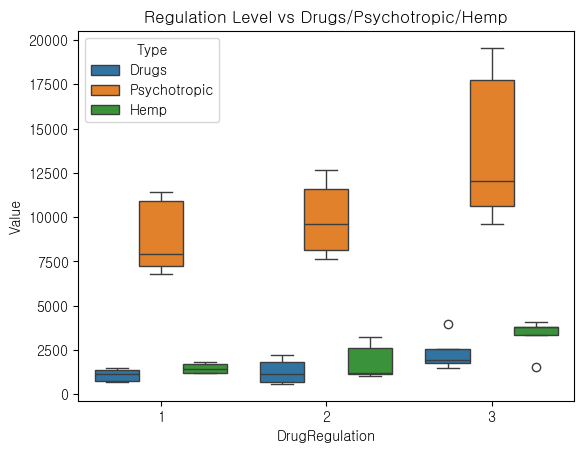

In [ ]:
cols = ['Drugs','Psychotropic','Hemp','DrugRegulation']

df_long = df.melt(id_vars='DrugRegulation',
                  value_vars=['Drugs','Psychotropic','Hemp'],
                  var_name='Type',
                  value_name='Value')

sns.boxplot(data=df_long, x='DrugRegulation', y='Value', hue='Type')
plt.title("Regulation Level vs Drugs/Psychotropic/Hemp")
plt.show()


# 마약 규제 정책이 마약 사건의 확산을 억제 하지못함
# 그중 향정류의 소비가 강하게 일어남
# 규제 강화는 시장(마약류 발생)을 억제하는 기능보다 사후 대응함


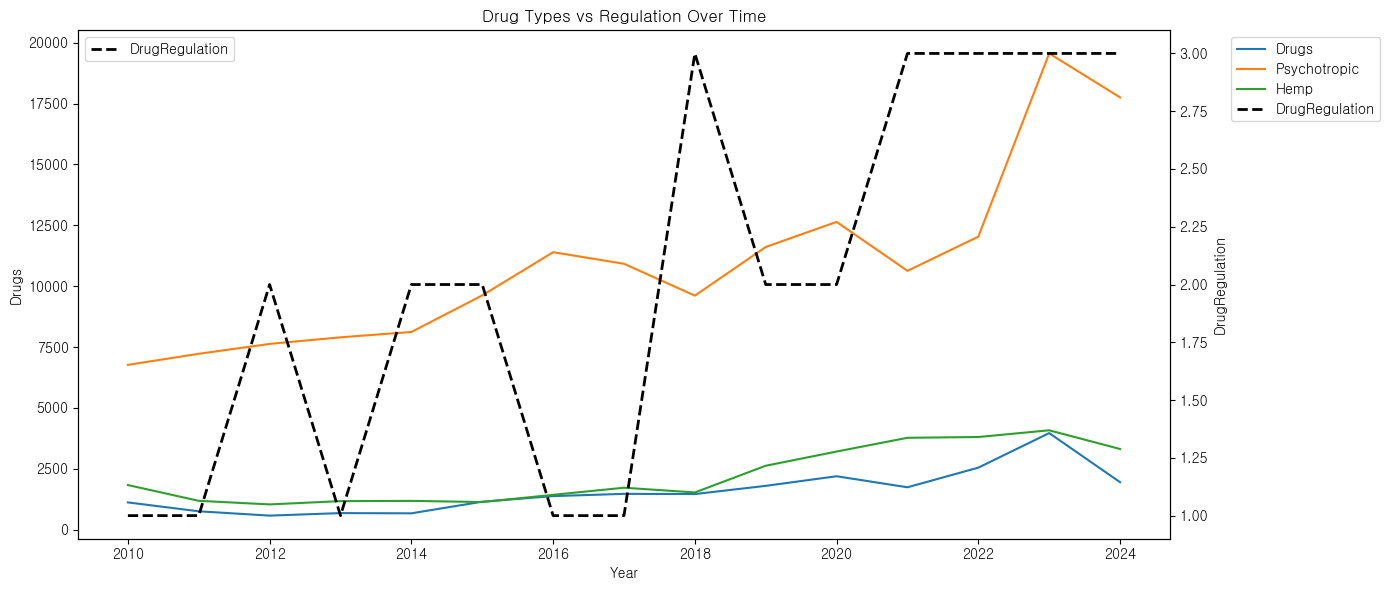

In [ ]:
plt.figure(figsize=(14,6))

# --- 1) Left Axis: Drug Types ---
ax1 = sns.lineplot(data=df, x='Year', y='Drugs', label='Drugs')
sns.lineplot(data=df, x='Year', y='Psychotropic', label='Psychotropic')
sns.lineplot(data=df, x='Year', y='Hemp', label='Hemp')

# --- 2) Right Axis: Regulation ---
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Year', y='DrugRegulation', 
             color='black', linestyle='--', linewidth=2,
             label='DrugRegulation', ax=ax2)

# --- 3) Legend Merge ---
lines_ax1, labels_ax1 = ax1.get_legend_handles_labels()
lines_ax2, labels_ax2 = ax2.get_legend_handles_labels()

ax1.legend(lines_ax1 + lines_ax2, labels_ax1 + labels_ax2,
           loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title("Drug Types vs Regulation Over Time")
plt.tight_layout()
plt.show()

# 정책의 즉각효과는있으나, 지속 효과는 없음
# 마약류 사건 수 증가이후 규제가 나타나므로 선제적 효과가 없음


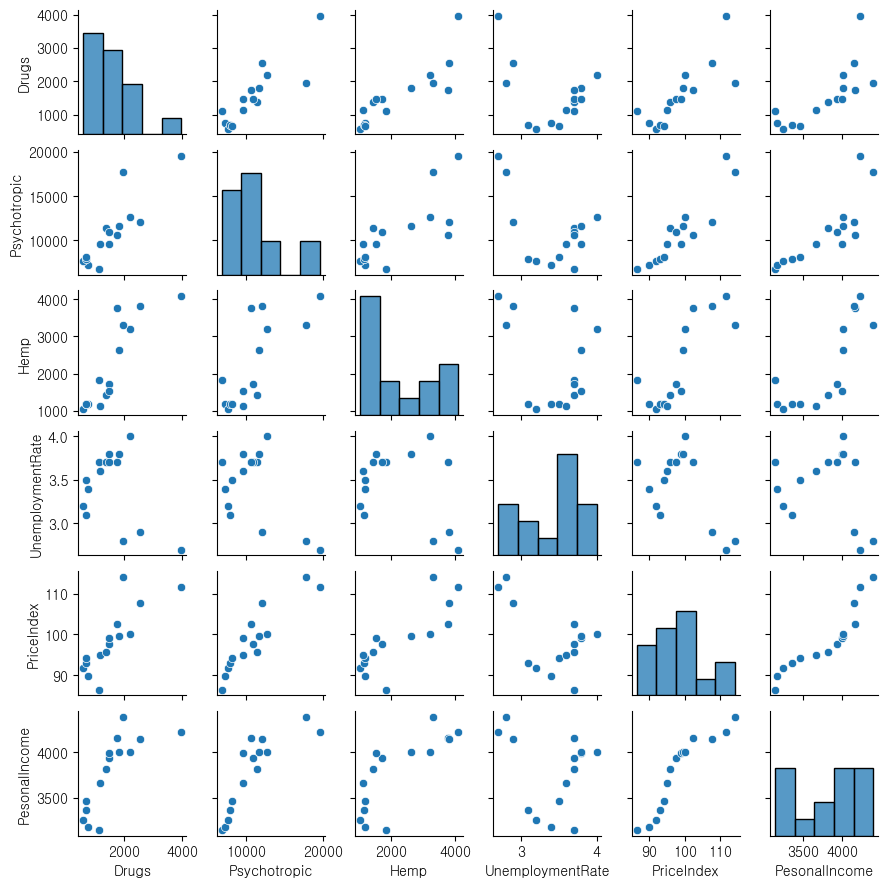

In [ ]:
sns.pairplot(df[['Drugs','Psychotropic','Hemp',
                 'UnemploymentRate','PriceIndex','PesonalIncome']],height=1.5)
plt.show()

# 향정(Psychotropic)는 경제 변수(특히 물가, 소득)와 아주 강한 양의 상관관계가 있다.
# 마약(Drugs)은 경제 지표와 중간 수준의 양의 상관관계를 가진다.
# 대마(Hemp)는 경제보다는 다른 요인(문화·접근성)이 더 큰 영향을 준다.
# 실업률(Unemployment)은 마약 증가와 상관이 약하다.
# 경제가 성장할수록 향정류·마약류 사건수가 증가하는 구조를 형성한다.

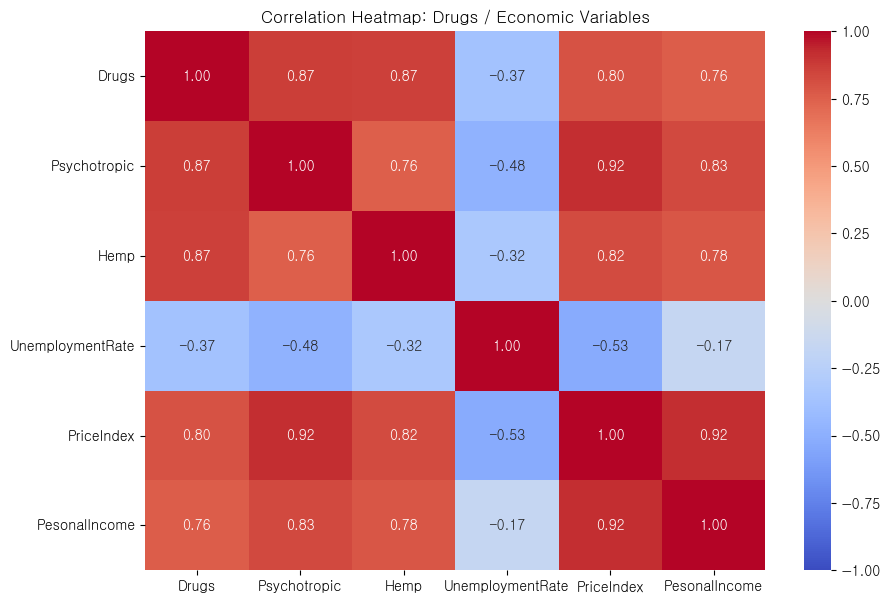

In [ ]:
plt.figure(figsize=(10, 7))

cols = ['Drugs','Psychotropic','Hemp',
        'UnemploymentRate','PriceIndex','PesonalIncome']

corr = df[cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title("Correlation Heatmap: Drugs / Economic Variables")
plt.show()

# 물가가 올라갈수록 마약류 소비/유통 규모도 전체적으로 증가한다.
# 경제 상황이 좋을 때 마약류 수요가 증가한다
# 실업률이 낮을수록 사회 활동·소득·소비가 증가 → 그에 따라 향정·마약 접근성도 증가
#  실업률은 “경제적 절망 → 마약 증가” 이런 전통적 가설과 반대 된다.
# 마약, 대마 ,향정 전체 마약류 시장이 동반 확장하는 구조임.
# 소비/유통 기반 약물이기 때문에 실업률 영향이 적다.